# DubsTech Covid-19 Health Analysis
## Cleaning data and working with data visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv",
                    usecols=["state", "hospital_pk", "collection_week", "hospital_name", "hospital_subtype",
                             "address", "city", "zip", "fips_code", "is_metro_micro",
                             "total_personnel_covid_vaccinated_doses_none_7_day",
                             "total_personnel_covid_vaccinated_doses_one_7_day",
                             "total_personnel_covid_vaccinated_doses_all_7_day",
                             "total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg",
                             "total_patients_hospitalized_confirmed_influenza_7_day_avg",
                             "total_patients_hospitalized_confirmed_influenza_7_day_sum",
                             "total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum",
                             "total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg",
                             "total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg",
                             "total_adult_patients_hospitalized_confirmed_covid_7_day_avg",
                             "total_adult_patients_hospitalized_confirmed_covid_7_day_sum",
                             "total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum",
                             "total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_18-19_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_20-29_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_30-39_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_40-49_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_50-59_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_60-69_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_70-79_7_day_sum",
                             "previous_day_admission_adult_covid_confirmed_80+_7_day_sum",
                             "previous_day_admission_pediatric_covid_confirmed_7_day_sum"])

C:\Users\efgro\AppData\Local\Temp\ipykernel_3408\2736877238.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv",


In [3]:
covid.columns

Index(['hospital_pk', 'collection_week', 'state', 'hospital_name', 'address',
       'city', 'zip', 'hospital_subtype', 'fips_code', 'is_metro_micro',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_patients_hospitalized_confirmed_influenza_7_day_avg',
       'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_sum',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum',
       'total_patients_hospitalized_confirmed_influenza_7_day_sum',
       'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum',
       'previous_day_admission_adult_covid_confirmed_18-19_7_day_sum',
       'previous_day_admission_adult_covid_confirmed_20-29_7_day_sum',
       'previous_day_admission_ad

In [4]:
covid.isna().sum()

hospital_pk                                                                       0
collection_week                                                                   0
state                                                                             0
hospital_name                                                                     0
address                                                                         445
city                                                                            445
zip                                                                              20
hospital_subtype                                                                  0
fips_code                                                                       926
is_metro_micro                                                                    0
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg     66809
total_adult_patients_hospitalized_confirmed_covid_7_day_avg                 

In [5]:
covid = covid.dropna()
covid.isna().sum()

hospital_pk                                                                  0
collection_week                                                              0
state                                                                        0
hospital_name                                                                0
address                                                                      0
city                                                                         0
zip                                                                          0
hospital_subtype                                                             0
fips_code                                                                    0
is_metro_micro                                                               0
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg    0
total_adult_patients_hospitalized_confirmed_covid_7_day_avg                  0
total_patients_hospitalized_confirmed_influenza_7_da

In [6]:
covid.shape

(208883, 31)

In [7]:
covid.to_csv("covid.csv")

Creating seperate dataframe for columns needed in US map

In [8]:
vaccine_map = covid[['total_personnel_covid_vaccinated_doses_none_7_day', 
                     'total_personnel_covid_vaccinated_doses_one_7_day',
                     'total_personnel_covid_vaccinated_doses_all_7_day',
                     'hospital_pk',
                     'collection_week',
                     'state',
                     'hospital_name',
                     'address',
                     'city',
                     'zip',
                     'hospital_subtype',
                     'fips_code']]
vaccine_map

,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,hospital_pk,collection_week,state,hospital_name,address,city,zip,hospital_subtype,fips_code
2415,202.0,148.0,8.0,360080,2021/01/22,OH,EAST OHIO REGIONAL HOSPITAL,90 NORTH FOURTH STREET,MARTINS FERRY,43935.0,Short Term,39013.0
2421,188.0,8.0,90.0,360368,2021/03/05,OH,KETTERING HEALTH TROY,600 WEST MAIN STREET,TROY,45373.0,Short Term,39109.0
3435,22.0,0.0,26.0,281311,2021/10/22,NE,FRANKLIN COUNTY MEMORIAL HOSPITAL,1406 Q ST,FRANKLIN,68939.0,Critical Access Hospitals,31061.0
3737,0.0,0.0,0.0,381324,2021/04/23,OR,ST CHARLES MADRAS,470 NE A STREET,MADRAS,97741.0,Critical Access Hospitals,41031.0
6410,294.0,19.0,339.0,230275,2021/10/08,MI,HEALTHSOURCE SAGINAW,3340 HOSPITAL ROAD,SAGINAW,48603.0,Short Term,26145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742237,213.0,12.0,416.0,360096,2022/04/15,OH,EAST LIVERPOOL CITY HOSPITAL,425 WEST 5TH STREET,EAST LIVERPOOL,43920.0,Short Term,39029.0
742238,112.0,30.0,140.0,440110,2021/05/21,TN,FORT LOUDON MEDICAL CENTER,550 FORT LOUDON MEDICAL CENTER DR,LENOIR CITY,37772.0,Short Term,47105.0
742239,90.0,70.0,46.0,440218,2021/07/16,TN,SAINT THOMAS HOSPITAL FOR SPECIALTY SURGERY,2011 MURPHY AVENUE,NASHVILLE,37203.0,Short Term,47037.0
742247,0.0,0.0,0.0,281316,2021/01/29,NE,WEBSTER COUNTY COMMUNITY HOSPITAL,"P O BOX 465, 621 N FRANKLIN ST",RED CLOUD,68970.0,Critical Access Hospitals,31181.0


Group hospitals by county and get the average value for each county

In [11]:
vaccine_map['FIPS'] = vaccine_map['fips_code']
vaccine_map.replace(-999999.0, np.nan, inplace=True)
map = vaccine_map.groupby('fips_code')['total_personnel_covid_vaccinated_doses_none_7_day',
                                      'total_personnel_covid_vaccinated_doses_one_7_day',
                                      'total_personnel_covid_vaccinated_doses_all_7_day'].mean()
map

C:\Users\efgro\AppData\Local\Temp\ipykernel_3408\4205547661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_map['FIPS'] = vaccine_map['fips_code']
C:\Users\efgro\AppData\Local\Temp\ipykernel_3408\4205547661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_map.replace(-999999.0, np.nan, inplace=True)
C:\Users\efgro\AppData\Local\Temp\ipykernel_3408\4205547661.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  map = vaccine_map.groupby('fips_code')['total_person

,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day
fips_code,,,
1001.0,187.036585,30.066667,213.256098
1003.0,285.754386,242.094675,356.629412
1007.0,106.666667,194.333333,187.234568
1011.0,25.972973,28.225806,85.648649
1013.0,165.225806,148.806452,136.225806
...,...,...,...
72127.0,33.392857,680.491228,675.771930
72141.0,6.068966,1.241379,82.758621
72145.0,0.000000,0.000000,0.000000


Import Geopandas for spacial analysis

In [12]:
import geopandas as gpd

Import counties dataset to create shapes for map

In [13]:
counties = gpd.read_file('cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
type(counties)

geopandas.geodataframe.GeoDataFrame

In [14]:
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


Merge data about hospitals and county shape file in order to plot data in US map

In [42]:
counties.GEOID = counties.GEOID.astype(float)
covid_counties = map.merge(counties, left_on = 'fips_code', right_on='GEOID', how='right')
type(covid_counties)

pandas.core.frame.DataFrame

Remove Hawaii and Alaska to create easily readble graph

In [43]:
covid_counties = covid_counties[covid_counties['STATEFP'] != '02']
covid_counties = covid_counties[covid_counties['STATEFP'] != '15']
covid_counties

,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,NaN,NaN,NaN,21,007,00516850,0500000US21007,21007.0,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,0.000000,0.000000,0.000000,21,017,00516855,0500000US21017,21017.0,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,NaN,NaN,NaN,21,031,00516862,0500000US21031,21031.0,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,15.923077,1.301587,89.753247,21,065,00516879,0500000US21065,21065.0,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,39.433962,1.260870,13.961538,21,069,00516881,0500000US21069,21069.0,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,NaN,NaN,NaN,31,073,00835858,0500000US31073,31073.0,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,137.725490,196.460000,171.137255,39,075,01074050,0500000US39075,39075.0,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,304.000000,27.000000,758.000000,48,171,01383871,0500000US48171,48171.0,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,236.118687,124.030691,271.878481,55,079,01581100,0500000US55079,55079.0,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


Create Washington data for testing, and remove 0 values with NaN to create accurate analysis of missings

In [46]:
gdf = gpd.GeoDataFrame(covid_counties, geometry=covid_counties.geometry)
gdf_wash = gdf[gdf['STATEFP'] == '53']
gdf.replace(0, np.nan, inplace=True)
gdf_wash.replace(0, np.nan, inplace=True)

Create prop_vax and diff_max values for graphs

In [76]:
gdf = gdf[gdf['STATEFP'] <= '56']
gdf['prop_vax'] = gdf['total_personnel_covid_vaccinated_doses_all_7_day']/gdf['total_personnel_covid_vaccinated_doses_none_7_day']
gdf['diff_vax'] = gdf['total_personnel_covid_vaccinated_doses_all_7_day'] - gdf['total_personnel_covid_vaccinated_doses_none_7_day']
gdf

,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,prop_vax,diff_vax
0,NaN,NaN,NaN,21,007,00516850,0500000US21007,21007.0,Ballard,06,639387454,6.947332e+07,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",NaN,NaN
1,NaN,NaN,NaN,21,017,00516855,0500000US21017,21017.0,Bourbon,06,750439351,4.829777e+06,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",NaN,NaN
2,NaN,NaN,NaN,21,031,00516862,0500000US21031,21031.0,Butler,06,1103571974,1.394304e+07,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",NaN,NaN
3,15.923077,1.301587,89.753247,21,065,00516879,0500000US21065,21065.0,Estill,06,655509930,6.516335e+06,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",5.636677,73.830170
4,39.433962,1.260870,13.961538,21,069,00516881,0500000US21069,21069.0,Fleming,06,902727151,7.182793e+06,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",0.354049,-25.472424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,NaN,NaN,NaN,31,073,00835858,0500000US31073,31073.0,Gosper,06,1186616237,1.183183e+07,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",NaN,NaN
3229,137.725490,196.460000,171.137255,39,075,01074050,0500000US39075,39075.0,Holmes,06,1094405866,3.695230e+06,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",1.242597,33.411765
3230,304.000000,27.000000,758.000000,48,171,01383871,0500000US48171,48171.0,Gillespie,06,2740719114,9.012764e+06,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",2.493421,454.000000
3231,236.118687,124.030691,271.878481,55,079,01581100,0500000US55079,55079.0,Milwaukee,06,625440563,2.455384e+09,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",1.151448,35.759794


Create Visualizations

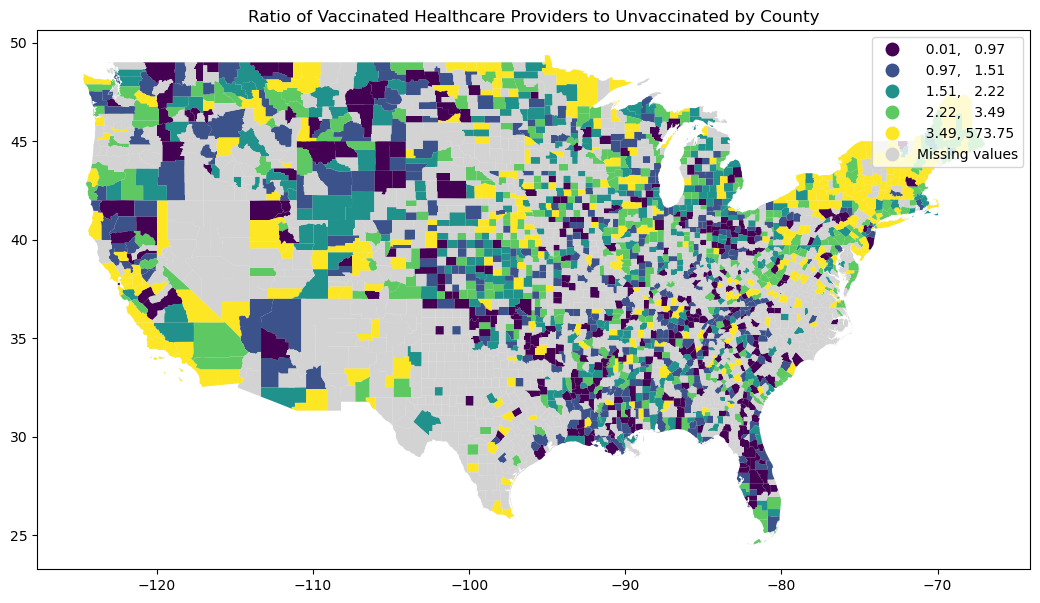

In [83]:
fig, ax = plt.subplots(1, figsize=(15,7))
gdf.plot(color="#EEEEEE", ax=ax)
gdf.plot(column='prop_vax', ax=ax, legend=True, scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values"
    })
plt.title("Ratio of Vaccinated Healthcare Providers to Unvaccinated by County")
plt.savefig('vaccine_county_prop.png')

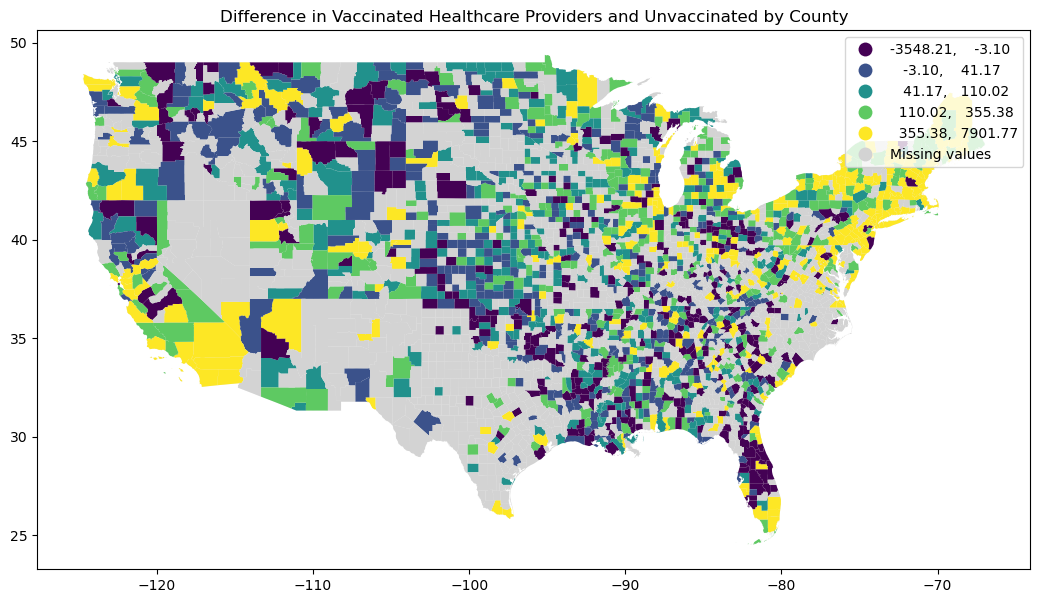

In [84]:
fig, ax = plt.subplots(1, figsize=(15,7))
gdf.plot(color="#EEEEEE", ax=ax)
gdf.plot(column='diff_vax', ax=ax, legend=True, scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values"
    })
plt.title("Difference in Vaccinated Healthcare Providers and Unvaccinated by County")
plt.savefig('vaccine_county_diff.png')

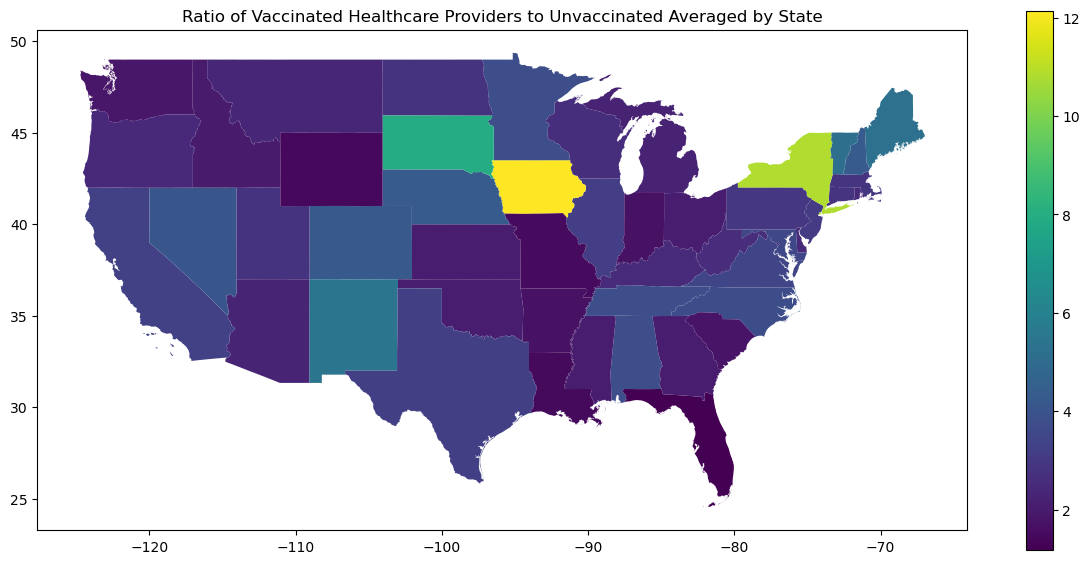

In [85]:
fig, ax = plt.subplots(1, figsize=(15,7))
df = gdf[['prop_vax', 'STATEFP', 'geometry']]
df = df.dissolve(by='STATEFP', aggfunc='mean')
df.plot(column = 'prop_vax', legend=True, ax=ax)
plt.title("Ratio of Vaccinated Healthcare Providers to Unvaccinated Averaged by State")
plt.savefig('states_vaccine_prop.png')

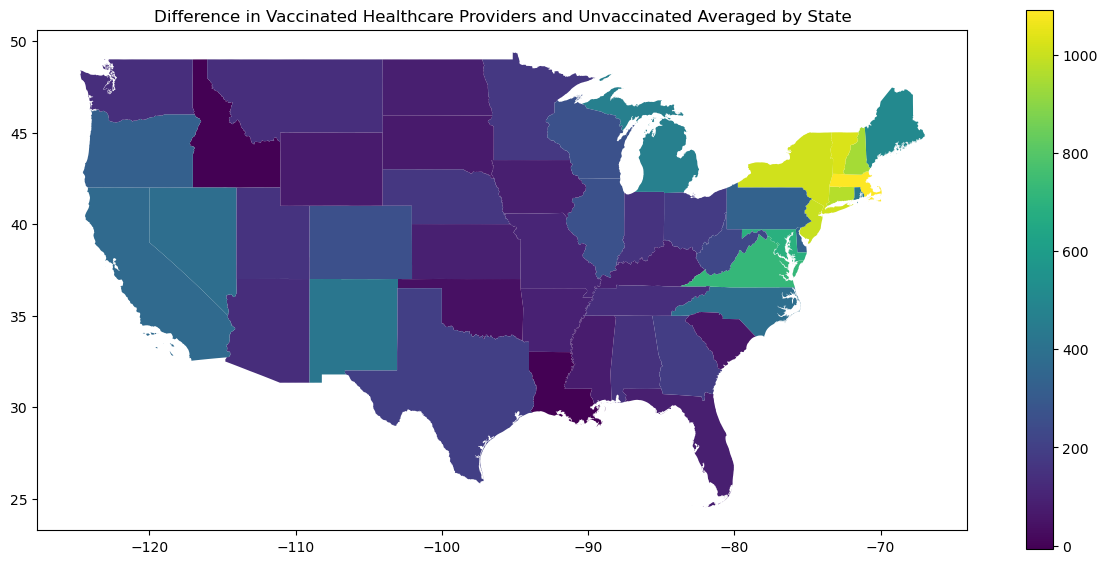

In [86]:
fig, ax = plt.subplots(1, figsize=(15,7))
df = gdf[['diff_vax', 'STATEFP', 'geometry']]
df = df.dissolve(by='STATEFP', aggfunc='mean')
df.plot(column = 'diff_vax', legend=True, ax=ax)
plt.title("Difference in Vaccinated Healthcare Providers and Unvaccinated Averaged by State")
plt.savefig('states_vaccine_diff.png')